In [37]:
df

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0
...,...,...,...,...,...,...,...,...,...,...,...
1495,48,0,2,3,4,9.183783,66,3,80,3,1
1496,27,1,2,10,3,14.847731,43,97,7,2,0
1497,24,1,1,1,2,4.289911,31,91,58,1,1
1498,48,0,2,4,4,36.299263,9,37,44,2,1


In [38]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1500 non-null   int64  
 1   Gender               1500 non-null   int64  
 2   EducationLevel       1500 non-null   int64  
 3   ExperienceYears      1500 non-null   int64  
 4   PreviousCompanies    1500 non-null   int64  
 5   DistanceFromCompany  1500 non-null   float64
 6   InterviewScore       1500 non-null   int64  
 7   SkillScore           1500 non-null   int64  
 8   PersonalityScore     1500 non-null   int64  
 9   RecruitmentStrategy  1500 non-null   int64  
 10  HiringDecision       1500 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 129.0 KB


In [39]:
df.describe()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,35.148667,0.492000,2.188000,7.694000,3.00200,25.505379,50.564000,51.116000,49.387333,1.893333,0.310000
std,9.252728,0.500103,0.862449,4.641414,1.41067,14.567151,28.626215,29.353563,29.353201,0.689642,0.462647
min,20.000000,0.000000,1.000000,0.000000,1.00000,1.031376,0.000000,0.000000,0.000000,1.000000,0.000000
25%,27.000000,0.000000,2.000000,4.000000,2.00000,12.838851,25.000000,25.750000,23.000000,1.000000,0.000000
50%,35.000000,0.000000,2.000000,8.000000,3.00000,25.502239,52.000000,53.000000,49.000000,2.000000,0.000000
75%,43.000000,1.000000,3.000000,12.000000,4.00000,37.737996,75.000000,76.000000,76.000000,2.000000,1.000000
max,50.000000,1.000000,4.000000,15.000000,5.00000,50.992462,100.000000,100.000000,100.000000,3.000000,1.000000


In [40]:
df.isnull().sum()

Age                    0
Gender                 0
EducationLevel         0
ExperienceYears        0
PreviousCompanies      0
DistanceFromCompany    0
InterviewScore         0
SkillScore             0
PersonalityScore       0
RecruitmentStrategy    0
HiringDecision         0
dtype: int64

In [41]:
cats = [i for i in df.columns if df[i].nunique() <= 4]
nums = [i for i in df.columns if i not in cats]

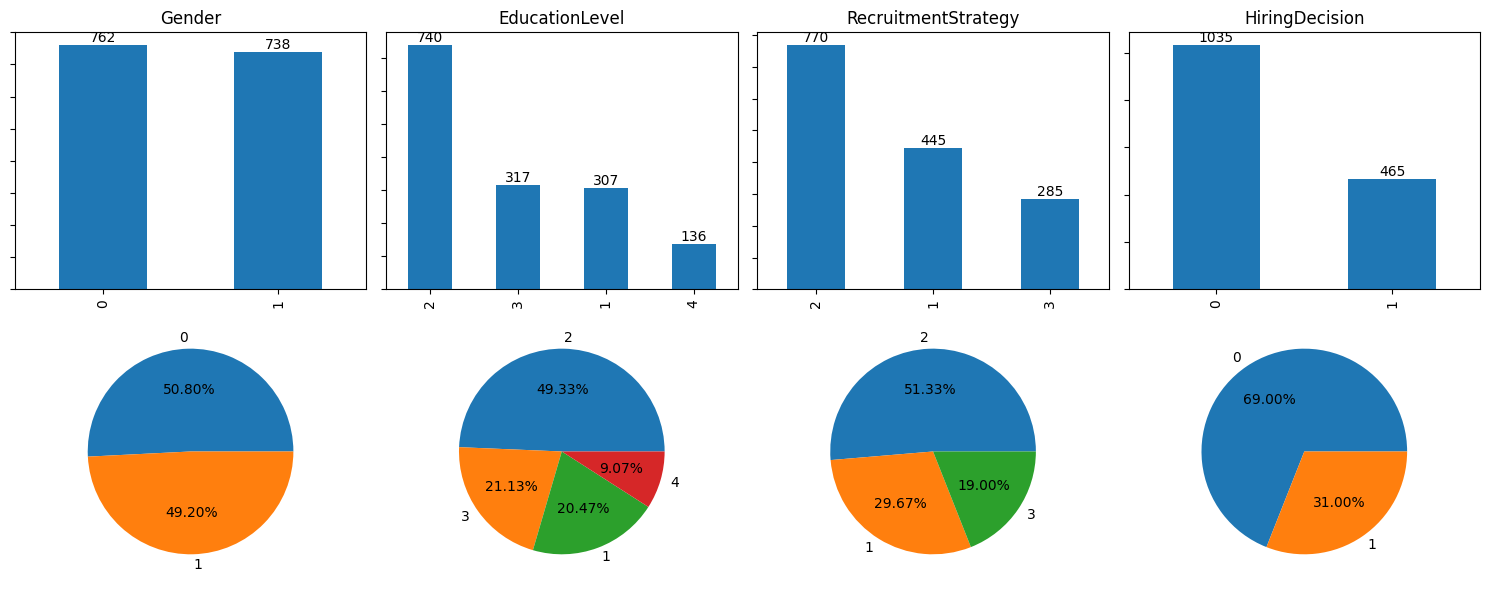

In [42]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 6))

for i, j in enumerate(cats):
    count = df[j].value_counts()
    index = 0
    count.plot(kind="bar", ax=axes[index][i])
    for container in axes[index][i].containers:
        axes[index][i].bar_label(container)
    axes[index][i].set_yticklabels(())
    axes[index][i].set_ylabel("")
    axes[index][i].set_xlabel("")
    axes[index][i].set_title(j)
    
    index += 1
    
    count.plot(kind="pie", ax=axes[index][i], autopct="%0.2f%%")
    axes[index][i].set_ylabel("")
    axes[index][i].set_xlabel("")
plt.tight_layout()
plt.show()

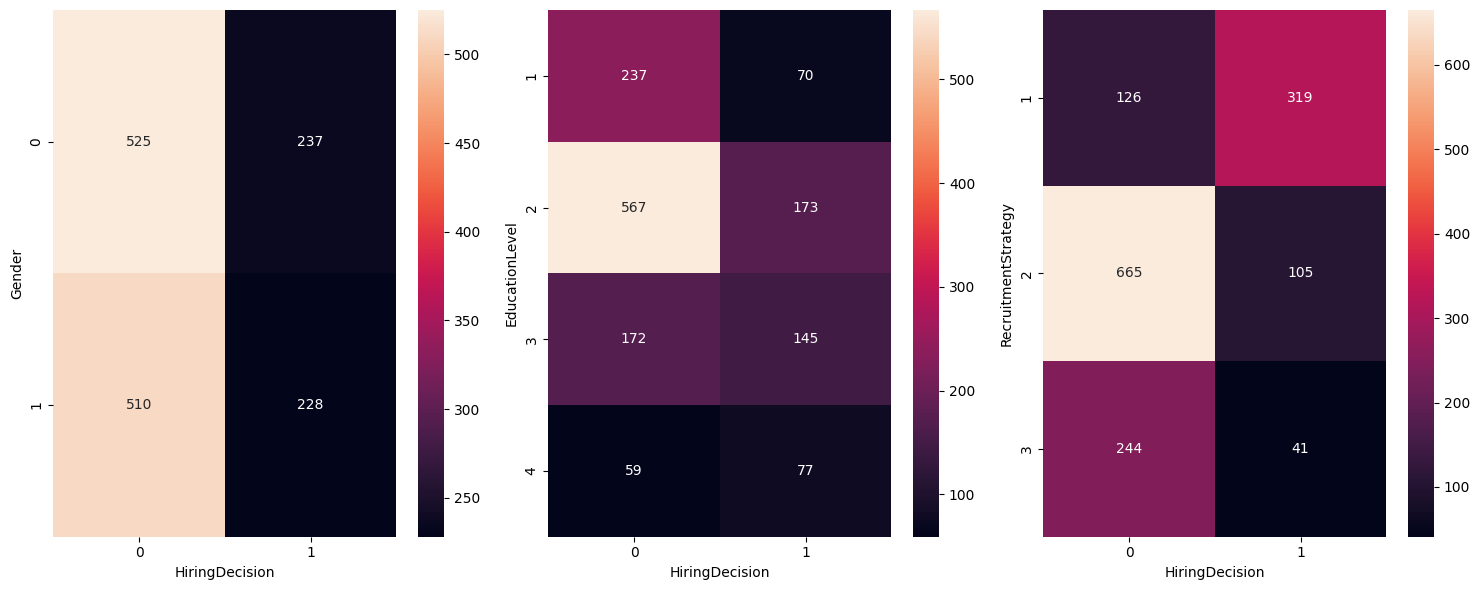

In [43]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 6))

for i, j in enumerate(cats[:-1]):
    sns.heatmap(pd.crosstab(df[j], df[cats[-1]]), annot=True, fmt='d', ax=axes[i])
plt.tight_layout()
plt.show()

In [44]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

scaler = MinMaxScaler()

x = scaler.fit_transform(x)

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [49]:
from collections import Counter
from imblearn.over_sampling import SMOTE

print("Before: ", Counter(y_train))

smote = SMOTE()
x_train, y_train = smote.fit_resample(x_train, y_train)

print("After: ", Counter(y_train))

Before:  Counter({np.int64(0): 820, np.int64(1): 380})
After:  Counter({np.int64(0): 820, np.int64(1): 820})


In [53]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [54]:
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
etc = ExtraTreesClassifier()
gbc = GradientBoostingClassifier()
svc = SVC()
lgr = LogisticRegression()
xgb = XGBClassifier()
lgb = LGBMClassifier()

models = [rfc, abc, etc, svc,
         lgr, gbc, xgb, lgb]

names = ["Random Forest", "Ada Boost", "Extra Trees", "Support Vector Machine",
        "Logistic Regression", "Gradient Boosting", "XGBoost", "LightGBM"]

In [58]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def training(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    score = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    return score, report, cm

scores, reports, cms = [], dict(), dict()

for model, name in zip(models, names):
    score, report, cm = training(model)
    scores.append(score)
    reports[name] = report
    cms[name] = cm


d:\salary_prediction\myenv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[LightGBM] [Info] Number of positive: 820, number of negative: 820
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000236 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1888
[LightGBM] [Info] Number of data points in the train set: 1640, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


C:\Users\kalas\AppData\Local\Temp\ipykernel_11436\3251924896.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes.set_xticklabels(axes.get_xticklabels(), rotation=90)


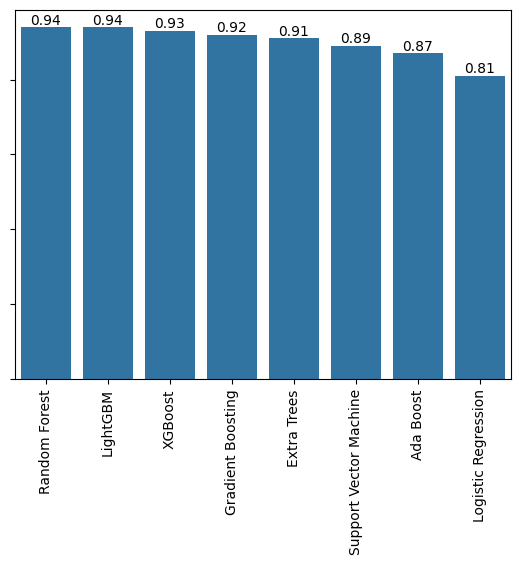

In [59]:
dd = pd.DataFrame({"scores": scores}, index=names)
dd = dd.sort_values("scores", ascending=False)
dd["scores"] = round(dd["scores"], 2)
fig, axes = plt.subplots()
sns.barplot(x=dd.index, y=dd.iloc[:, 0], ax=axes)
for container in axes.containers:
    axes.bar_label(container)
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
axes.set_yticklabels(())
axes.set_ylabel("")
axes.set_xlabel("")
plt.show()

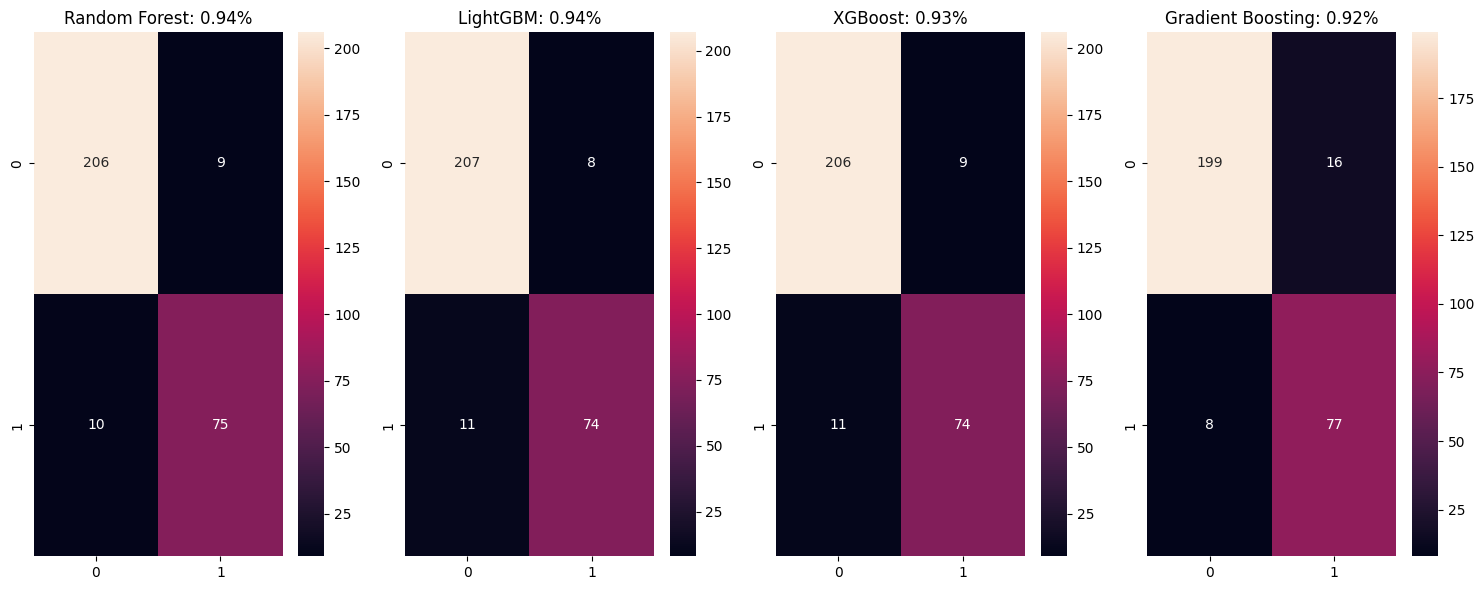

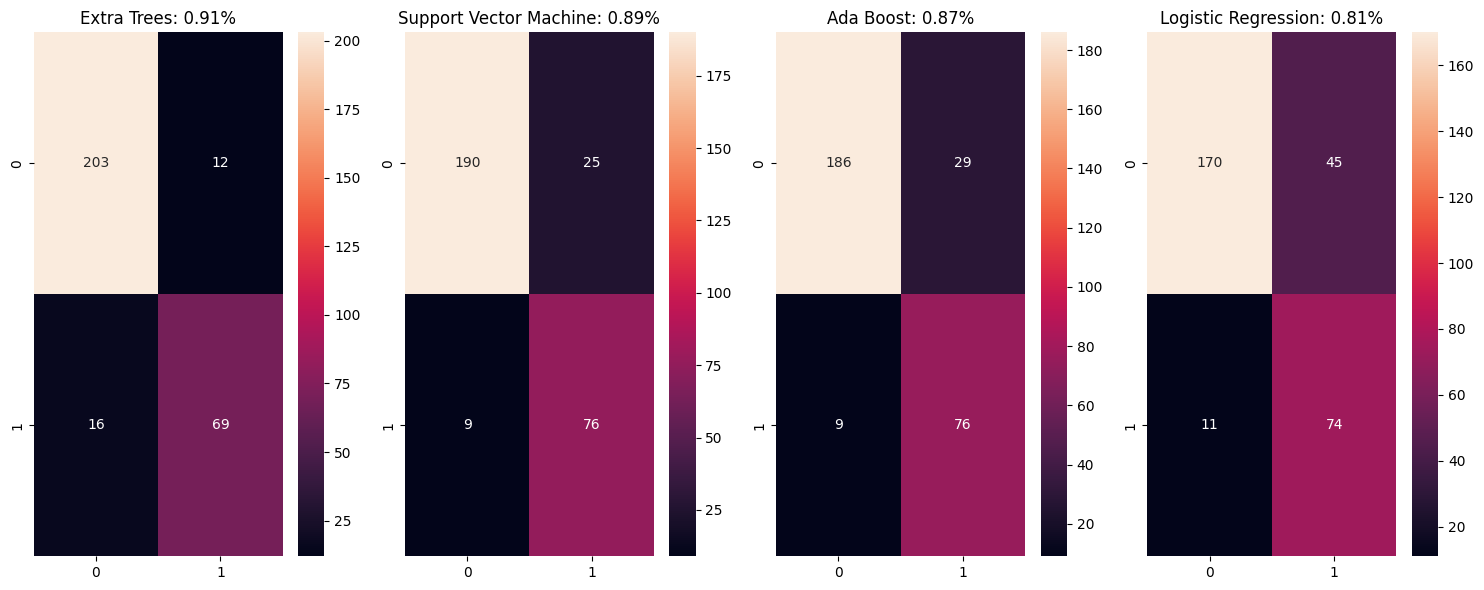

In [60]:
index = 0

for i in range(2):
    fig, axes = plt.subplots(ncols=4, figsize=(15, 6))
    for j in range(4):
        sns.heatmap(cms[dd.index[index]], annot=True, fmt='d', ax=axes[j])
        axes[j].set_title("{}: {}%".format(dd.index[index], dd.iloc[index, 0]))
        index += 1
    plt.tight_layout()
    plt.show()

In [61]:
for i in dd.index:
    print("*"*30)
    print(i)
    print(reports[i])
    print("\n\n")

******************************
Random Forest
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       215
           1       0.89      0.88      0.89        85

    accuracy                           0.94       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.94      0.94      0.94       300




******************************
LightGBM
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       215
           1       0.90      0.87      0.89        85

    accuracy                           0.94       300
   macro avg       0.93      0.92      0.92       300
weighted avg       0.94      0.94      0.94       300




******************************
XGBoost
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       215
           1       0.89      0.87      0.88        85

    accuracy                           0.93       30

In [68]:
# Random Forest is performing the best
# we will use it as our final model

final_model = rfc.fit(x_train, y_train)
y_pred = final_model.predict(x_test)
score = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(score,report,cm)

0.9366666666666666               precision    recall  f1-score   support

           0       0.95      0.96      0.96       215
           1       0.89      0.88      0.89        85

    accuracy                           0.94       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.94      0.94      0.94       300
 [[206   9]
 [ 10  75]]


In [69]:
import pickle
pickle.dump(final_model,open('hiring_model.pkl','wb'))

In [70]:
df.columns

Index(['Age', 'Gender', 'EducationLevel', 'ExperienceYears',
       'PreviousCompanies', 'DistanceFromCompany', 'InterviewScore',
       'SkillScore', 'PersonalityScore', 'RecruitmentStrategy',
       'HiringDecision'],
      dtype='object')